In [19]:
# download dataset from kaggle, makesure to have kaggle.json in ~/.kaggle
! kaggle datasets download uciml/indian-liver-patient-records --unzip --w

Dataset URL: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records
License(s): CC0-1.0




  0%|          | 0.00/7.68k [00:00<?, ?B/s]
100%|██████████| 7.68k/7.68k [00:00<00:00, 6.14MB/s]


In [20]:
# basic imports for data analysis and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# read the dataset into a pandas dataframe
df = pd.read_csv('indian_liver_patient.csv')

In [22]:
# look at the dataset
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
# see for null valls and datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [24]:
#drop all rows with null values
df.dropna(inplace=True)

In [25]:
# look at final shape of the dataset with no null vals 
df.shape

(579, 11)

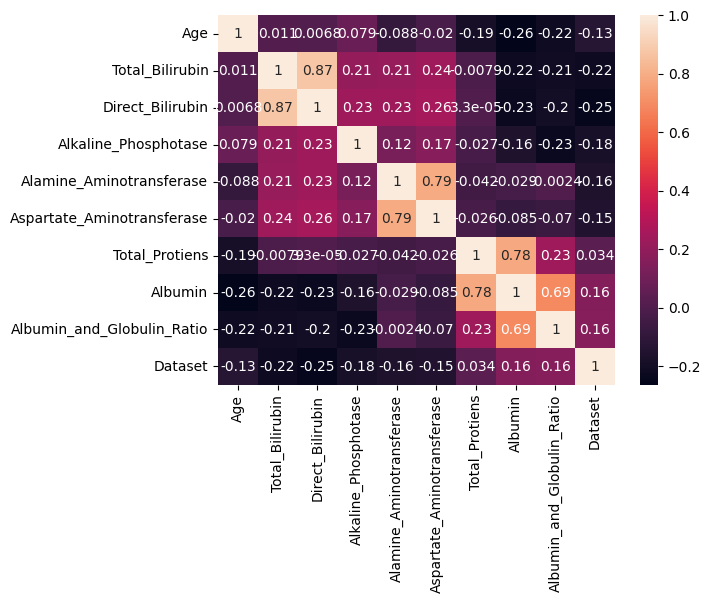

In [26]:
# look at the correlation matrix
plt.plot(figsize=(40,40))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [30]:
# convert gender to binary, going to try LabelEncoder by sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [31]:
# check how data looks like now
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [32]:
# normalize age 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])

In [33]:
# look at new normalized age 
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,0.674419,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,0.674419,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,0.627907,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,0.790698,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
# check if other data needs to be normalized
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.474214,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,0.188625,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,0.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,0.337209,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,0.476744,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,0.627907,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,1.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [35]:
# lots of normalization needed lets do it one by one 
df["Total_Bilirubin"] = scaler.fit_transform(df[["Total_Bilirubin"]])
df["Direct_Bilirubin"] = scaler.fit_transform(df[["Direct_Bilirubin"]])
df["Alkaline_Phosphotase"] = scaler.fit_transform(df[["Alkaline_Phosphotase"]])
df["Alamine_Aminotransferase"] = scaler.fit_transform(df[["Alamine_Aminotransferase"]])
df["Aspartate_Aminotransferase"] = scaler.fit_transform(df[["Aspartate_Aminotransferase"]])
df["Total_Protiens"] = scaler.fit_transform(df[["Total_Protiens"]])
df["Albumin"] = scaler.fit_transform(df[["Albumin"]])
df["Albumin_and_Globulin_Ratio"] = scaler.fit_transform(df[["Albumin_and_Globulin_Ratio"]])
 # I personally think 0 and 1 are better than 1 and 2
df["Dataset"].map({2:1, 1:0})

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 579, dtype: int64

In [36]:
# check new data
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1


In [37]:
# data preprocessing done, lets split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop("Dataset", axis=1)
y = df["Dataset"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# lets try DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# more evaluation metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.64      0.74      0.69        73
           2       0.41      0.30      0.35        43

    accuracy                           0.58       116
   macro avg       0.52      0.52      0.52       116
weighted avg       0.56      0.58      0.56       116

[[54 19]
 [30 13]]
0.5775862068965517
